In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [2]:
data = np.load('sdss_galaxy_colors.npy')

# Split data into features and targets
features = np.zeros((data.shape[0], 4))
features[:, 0] = data['u'] - data['g']
features[:, 1] = data['g'] - data['r']
features[:, 2] = data['r'] - data['i']
features[:, 3] = data['i'] - data['z']

targets = data['redshift']

In [3]:
# Split data into training and testing
split = 2 * features.shape[0] // 3
trainFeatures = features[:split]
testFeatures = features[split:]

trainTargets = targets[:split]
testTargets = targets[split:]

In [4]:
# Create and train regression model
model = DecisionTreeRegressor()
model.fit(trainFeatures, trainTargets)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Text(0,0.5,'Frequency')

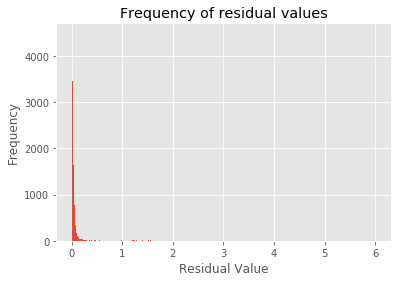

In [5]:
# Generate predictions and plot residuals
predictions = model.predict(testFeatures)
residuals = abs(predictions - testTargets)
plt.style.use('ggplot')
plt.hist(residuals, bins=np.arange(min(residuals), max(residuals) + 0.01, 0.01))
plt.title('Frequency of residual values')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

The outliers are messing up our view of the graph, so let's view it with an upper bound of 0.5:

Text(0,0.5,'Frequency')

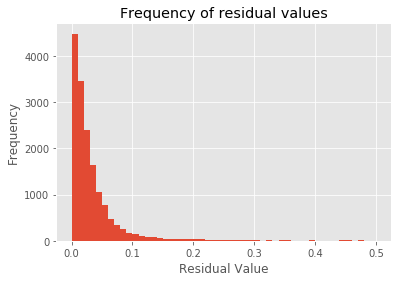

In [6]:
plt.hist(residuals, bins=np.arange(min(residuals), 0.5 + 0.01, 0.01))
plt.title('Frequency of residual values')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

It's clear that our distribution is skewed, so the median will give a better estimate of our error. 

In [7]:
error = np.median(abs(predictions - testTargets))
print(error)

0.02158739


Now that we know which metric to calculate error with, let's find the best tree depth to use.

Text(0.5,1,'Error as a Function of Tree Depth')

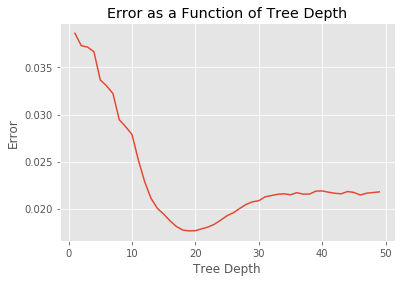

In [8]:
depths = [i for i in range(1, 50, 1)]
errors = []
for depth in depths:
    model = DecisionTreeRegressor(max_depth = depth)
    model.fit(trainFeatures, trainTargets)
    
    predictions = model.predict(testFeatures)
    errors.append(np.median(abs(predictions - testTargets)))
plt.plot(depths, errors)
plt.xlabel('Tree Depth')
plt.ylabel('Error')
plt.title('Error as a Function of Tree Depth')

In [9]:
bestDepth = np.argmin(errors)
print('The best depth to use is {}, which corresponds to a median error of {}'.format(bestDepth + 1, errors[bestDepth]))

The best depth to use is 19, which corresponds to a median error of 0.0176312
